# Healthcare Partners INC - Explolatory Data Analysis (EDA)

## Notebook Outline

## Exploratory Data Aanalysis - Dataset

### Import Packages and Load the Dataset
In this section, the Python packages are loaded, the dataset is read into the Notebook and examine the datastructure


In [1]:
# Import Packages
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ipywidgets import interact, widgets

The orginal dataset was cleaned in the Data Wrangling Notebook, that generated the tidy_dataset.csv. This csv file is loaded into this notebook for EDA 

In [2]:
#load data
df = pd.read_csv('tidy_dataset.csv')

#### Examine the dataset

The Objective of this notebook is to identify the data structure, look for patterns and relationships within the dataset. I will attempt to create various visualizations to identiify patterns and anomalies hoping to extract meaningful insights.

In [3]:
#Examine the columns (features/variables) in the dataset
df.columns

Index(['Market_type', 'Contract_freq', 'Fiscal_earned_year', 'due_month',
       'due_year', 'Check_Amount', 'CATEGORY_DESC', 'Market_category',
       'percent_vals', 'average'],
      dtype='object')

In [4]:
# A quck look at the the dataset
df.head()

,Market_type,Contract_freq,Fiscal_earned_year,due_month,due_year,Check_Amount,CATEGORY_DESC,Market_category,percent_vals,average
0,Laboratory,Monthly,2003,4,2003,543310.00,Clinical Reference Laboratory Testing Services,Facilities and Material,3,3.0
1,Laboratory,Monthly,2003,4,2003,229343.21,Clinical Reference Laboratory Testing Services,Facilities and Material,3,3.0
2,Laboratory,Monthly,2003,4,2003,201440.18,Clinical Reference Laboratory Testing Services,Facilities and Material,3,3.0
3,Laboratory,Monthly,2003,4,2003,272868.54,Clinical Reference Laboratory Testing Services,Facilities and Material,3,3.0
4,Laboratory,Monthly,2003,4,2003,239092.78,Clinical Reference Laboratory Testing Services,Facilities and Material,3,3.0


In [5]:
df['Market_category'].value_counts()

Services                   275683
Facilities and Material     75345
Pharmaceuticals             60834
Food                        58119
Name: Market_category, dtype: int64

In [6]:
df['Contract_freq'].value_counts()

Monthly         388343
Quarterly        81216
Annual             384
As Submitted         9
Name: Contract_freq, dtype: int64

My Target variable is the Check_Amount, and in the next sections, I would examine the relationships (if they do exist) with Due Month which is closely connected with the Contract Frequency (this is where the contract dictates how often the check amount is paid) and Market Category (which are the different types of businesses).

### The Exploaratory Data Analysis on the Dataset

I begin with the summary statistics of the Check_amount, as I identify the check amount to be the primary focus of this analysis. 

## Check Amount  begins here

#### Check Amount - The Target variable (Dependent)

In the next section, I make an attempt to examine the 'Check_Amount' data for the corresponding years from 2012 to 2022. I choose a box plot to visualize the distribution of these amounts across these years.

##### Check Amount  - Visualization


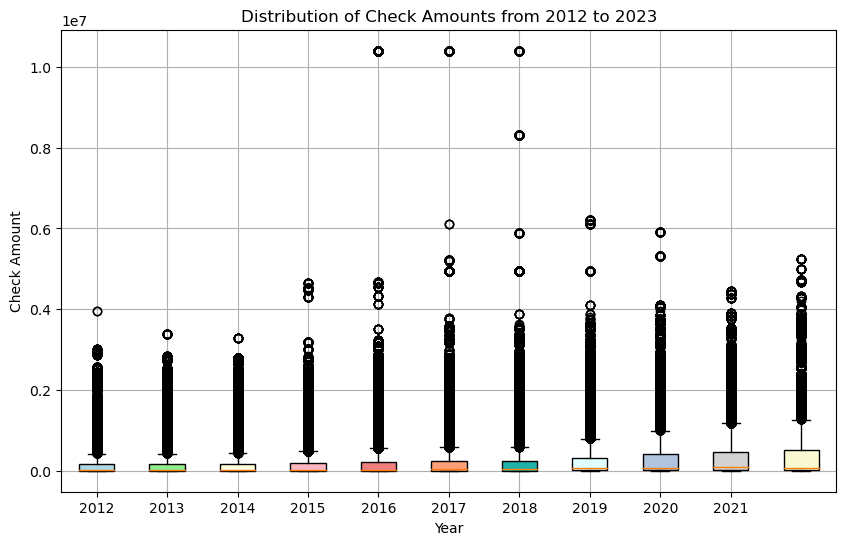

In [7]:
# Filter rows for the past 10 years (2012 - 2022)
filtered_data = df[df['Fiscal_earned_year'].between(2012, 2023)]

# Create a box plot
plt.figure(figsize=(10, 6))
box = plt.boxplot([filtered_data[filtered_data['Fiscal_earned_year'] == year]['Check_Amount'] for year in range(2012, 2023)],
                  patch_artist=True)

plt.xlabel('Year')
plt.ylabel('Check Amount')
plt.title('Distribution of Check Amounts from 2012 to 2023')
plt.xticks(ticks=range(1, 11), labels=range(2012, 2022))  # Assigning labels for each year
plt.grid(True)

# Adding colors to the box plots
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightcoral', 'lightsalmon',
          'lightseagreen', 'lightcyan', 'lightsteelblue', 'lightgrey', 'lightgoldenrodyellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

The box plot tells there are several outliers.


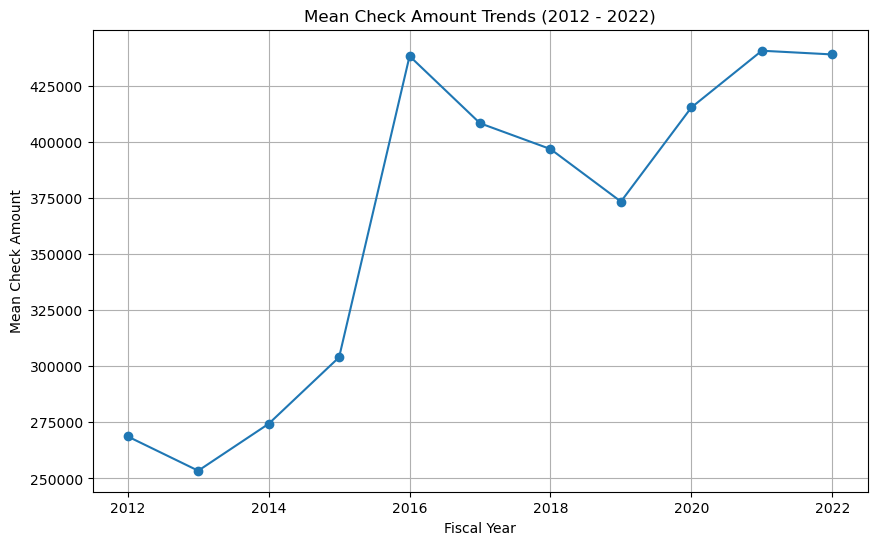

In [8]:
# This plot look at the mean check amount over the years 2012-2022
import matplotlib.pyplot as plt

def plot_check_amount_trends(data, from_yr, to_yr):
    '''This function visualizes the mean Check_Amount trends over a series of years'''
    # Filter rows for the specified years
    filtered_data = data[data['Fiscal_earned_year'].between(from_yr, to_yr)]

    # Calculate mean Check_Amount for each year
    mean_check_amount_by_year = filtered_data.groupby('Fiscal_earned_year')['Check_Amount'].mean()

    # Create a line chart for mean Check_Amount trends across years
    plt.figure(figsize=(10, 6))
    plt.plot(mean_check_amount_by_year.index, mean_check_amount_by_year.values, marker='o', linestyle='-')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Mean Check Amount')
    plt.title(f'Mean Check Amount Trends ({from_yr} - {to_yr})')
    plt.grid(True)
    plt.show()

# Example function call with the dataframe reference, the start year, and the end year
plot_check_amount_trends(df, 2012, 2022)


##### Check Amount - Summary Statistics

In [9]:
# The summary statistics of the Check_Amount
df['Check_Amount'].describe()

count    4.699810e+05
mean     3.756390e+05
std      8.396662e+05
min      1.000000e-02
25%      4.333560e+03
50%      4.283750e+04
75%      2.854871e+05
max      1.040222e+07
Name: Check_Amount, dtype: float64

##### Check Amount  - Observations
There are 469,981 records (samples) in the dataset. The aveeage amount is $375,639. There is a significant spread around the mean, that indicates a greater variablity. THe mimimum and maximum check amount shows the dispersion. The quartiles also help understand the story.

My Observations based on the Summary Statistics:
1. The mean check amount is higer than the 50% percentile that indicates a potential right-skewed distribution
2. The significantly large standard deviation indicates a wide variability in the check amount
3. The majority of the check amount values are concentrated towards the lower amounts
4. The noticeable difference between the 75th percentile and the maximum check amount value indicates there are outliers mostly in the upper end of the distribution.


Lookimg at the data set, and the variablity of the check amount, I think the amount depends on the Market Category, which are the different types of business lines.

In the following section, I plan to examine the breakdown of the check amount per month, to take a closer look at the breakdown.


## Due Month  begins here

#### Due-Month  - This variable represents the monthly receipts

##### Due Month -  Visualization

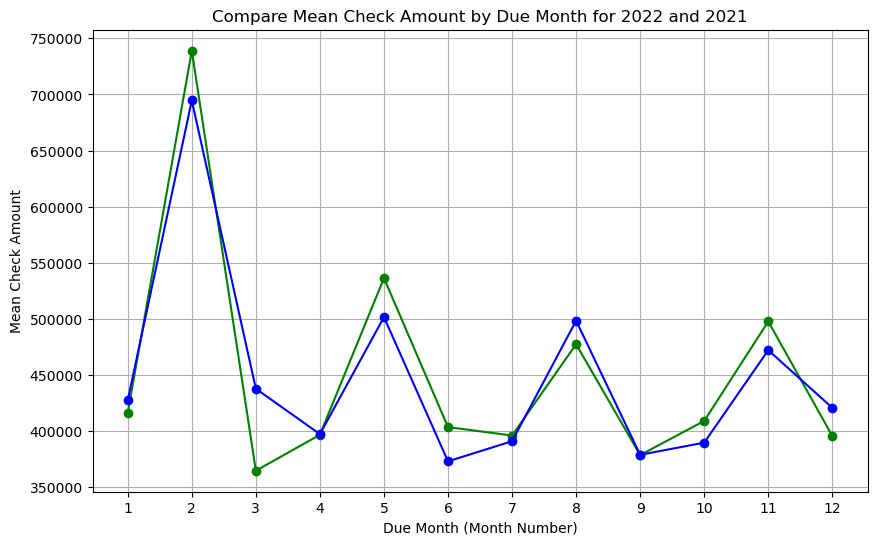

In [10]:
# Get a feel for a couple of years

# Filter rows for the year 2022
data_2022 = df[df['Fiscal_earned_year'] == 2022]
data_2021 = df[df['Fiscal_earned_year'] == 2021]

# Calculate the mean 'Check_Amount' for each due month in 2022
mean_check_amount_2022 = data_2022.groupby('due_month')['Check_Amount'].mean()
mean_check_amount_2021 = data_2021.groupby('due_month')['Check_Amount'].mean()

# Create a line chart for 2021 and 2022 due months
plt.figure(figsize=(10, 6))
plt.plot(mean_check_amount_2022.index, mean_check_amount_2022.values, marker='o', linestyle='-', color='green')
plt.plot(mean_check_amount_2021.index, mean_check_amount_2021.values, marker='o', linestyle='-', color='blue')

plt.xlabel('Due Month (Month Number)')
plt.ylabel('Mean Check Amount')
plt.title('Compare Mean Check Amount by Due Month for 2022 and 2021')
plt.xticks(mean_check_amount_2022.index)  # Set x-axis ticks to match months
plt.grid(True)

plt.show()

The yearly amounts received over each month somewhat follows a similar pattern

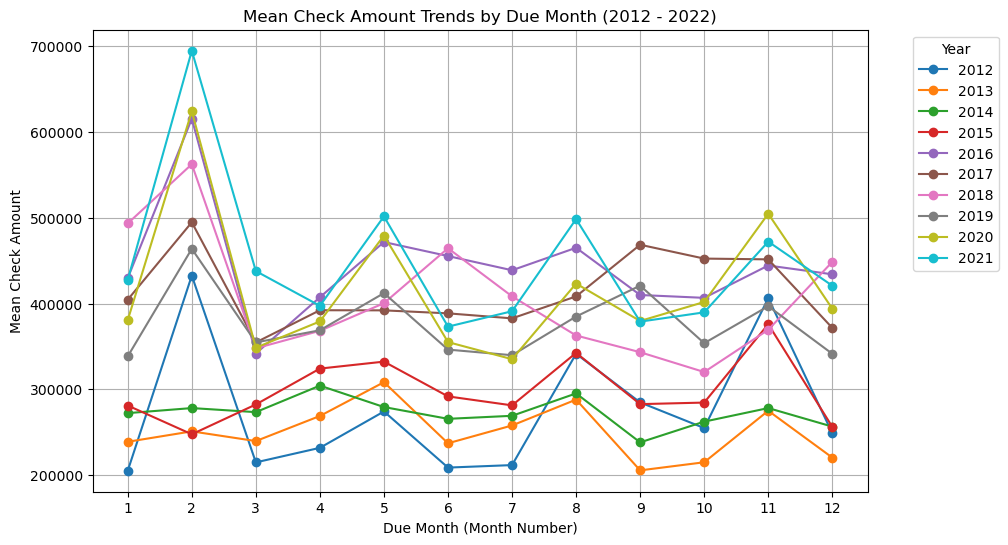

In [11]:
def plot_check_amount_trends(data, from_yr, to_yr):
    '''This function helps to look at a series of specific years '''
    # Filter rows for years 2012 to 2022
    #filtered_data = data[data['Fiscal_earned_year'].between(2012, 2022)]
    filtered_data = data[data['Fiscal_earned_year'].between(from_yr, to_yr)]

    # Initialize an empty dictionary to store mean Check_Amount data for each year
    mean_check_amount_by_year = {}

    # Calculate mean Check_Amount for each year and store it in the dictionary
    for year in range(from_yr, to_yr):
        year_data = filtered_data[filtered_data['Fiscal_earned_year'] == year]
        mean_check_amount_by_year[year] = year_data.groupby('due_month')['Check_Amount'].mean()

    # Create a line chart for mean Check_Amount trends for each year
    plt.figure(figsize=(10, 6))

    for year, data in mean_check_amount_by_year.items():
        plt.plot(data.index, data.values, marker='o', linestyle='-', label=str(year))

    plt.xlabel('Due Month (Month Number)')
    plt.ylabel('Mean Check Amount')
    #plt.title('Mean Check Amount Trends by Due Month (2012 - 2022)')
    
    title_text = f"Mean Check Amount Trends by Due Month ({from_yr} - {to_yr})"
    plt.title(title_text)

    
    plt.xticks(data.index)  # Set x-axis ticks to match months (assuming all years have the same months)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

    plt.show()


#function call with the dataframe reference, the begin year and the end year
plot_check_amount_trends(df, 2012, 2022)

Based on this visualization, I am convinced that there is a relationship which month the payment is received. All past years follow similar pattern of receipt of check_amount.

I generated the below interactive plot to help visualize the change over the years.

In [12]:
# Visualize how the Check_Amount compares to the Market Categories over the years
def plot_check_amount(year):
    # Select the data for the specific year
    data_year = df[df['Fiscal_earned_year'] == year]
    # Group by 'Due_month' and 'Market_category' to get the mean check amount for each month and market category in the year
    check_amount_year = data_year.groupby('due_month')['Check_Amount'].mean()
    plt.figure(figsize=(10, 6))
    check_amount_year.plot(kind='bar', color='coral')
    plt.xlabel('Due Month (Month Number)')
    plt.ylabel('Check Amount')
    plt.title('Mean Check Amount for Each Month in ' + str(year))
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

interact(plot_check_amount, year=widgets.IntSlider(min=2012, max=2022, step=1, value=2012))

interactive(children=(IntSlider(value=2012, description='year', max=2022, min=2012), Output()), _dom_classes=(…

<function __main__.plot_check_amount(year)>

Based on the above visualization, it is clear that check amounts varies over each month during a given year, even though there are a couple of years there was little variation - 2014, 2015 and 2017. 


##### Due Month -  Summary Statistics

In [13]:
# Group by 'Market_category' and get summary statistics for 'Check_Amount'
summary_stats = df.groupby('due_month')['Check_Amount'].describe()

# Display the summary statistics
print(summary_stats)

             count           mean           std   min        25%         50%  \
due_month                                                                      
1          40770.0  368087.547236  8.475536e+05  0.01   4440.180   38393.150   
2          20262.0  538780.313036  1.001674e+06  0.01  10132.600  100251.765   
3          50697.0  339123.331443  7.912393e+05  0.01   3411.230   32170.510   
4          44889.0  354586.877413  7.793226e+05  0.01   4167.720   37241.010   
5          43601.0  405626.971865  8.401811e+05  0.01   4526.440   48736.460   
6          31995.0  351205.058508  8.367194e+05  0.01   4204.030   42492.100   
7          40279.0  339548.794049  7.798081e+05  0.01   3860.475   34755.750   
8          44939.0  387962.722329  8.061968e+05  0.01   4628.280   49827.650   
9          33560.0  359304.664603  8.701706e+05  0.01   3958.965   40570.850   
10         40886.0  355829.950017  8.274714e+05  0.01   3861.620   36150.110   
11         44890.0  420196.619363  9.157

##### Due Month  - Observations

• Trends Across Months: There's a considerable variation in the mean 'Check_Amount' across different months. For example, in certain months (like February and November), the mean 'Check_Amount' appears notably higher compared to other months. This could imply seasonality or specific periods of increased financial activity.

• Wide Range and Significant Spread: The standard deviation is considerably high, indicating a wide dispersion of 'Check_Amount' values around the mean for each month. This suggests a significant variation in financial transactions across months.

• Outliers and Extreme Values: The maximum 'Check_Amount' for each month is notably higher than the 75th percentile, indicating the presence of potential outliers or extremely high transactions in certain months. Further investigation is needed on these outliers anomalies or unique occurrences.

• Consistency in Medians: The median 'Check_Amount' (50th percentile) appears relatively consistent across the months, indicating that, in general, there's a stable central tendency of 'Check_Amount' for the middle data points within each month.

• Overall, this data distribution indicates notable variations in 'Check_Amount' across different months, with certain months experiencing significantly higher financial transactions compared to others.


###### Overall, these observations suggest a diverse and fluctuating pattern in 'Check_Amount' across different months. Further analysis on Market Category (the different Business lines) and the Contract Frequency (which denotes when contractually members are obligated to pay) will be done in the sections that follow 

## Market Gategory  begins here

##### Market Category  -  Visualization

In [14]:
# Filter rows for 2021 and 2022 separately and calculate the mean of 'Check_Amount' for each Market Category

mean_check_amount_Services = df[df['Market_category'] == 'Services']['Check_Amount'].mean()
mean_check_amount_fm = df[df['Market_category'] == 'Facilities and Material']['Check_Amount'].mean()
mean_check_amount_ph = df[df['Market_category'] == 'Pharmaceuticals']['Check_Amount'].mean()
mean_check_amount_fd = df[df['Market_category'] == 'Food']['Check_Amount'].mean()

print(f"The mean Check_Amount in Services is: {mean_check_amount_Services}")
print(f"The mean Check_Amount in Facilities and Material is: {mean_check_amount_fm}")
print(f"The mean Check_Amount in Pharmaceuticals is: {mean_check_amount_ph}")
print(f"The mean Check_Amount in Food is: {mean_check_amount_fd}")

The mean Check_Amount in Services is: 484112.5435058019
The mean Check_Amount in Facilities and Material is: 161928.9715555113
The mean Check_Amount in Pharmaceuticals is: 188127.40237301314
The mean Check_Amount in Food is: 334425.9619575354


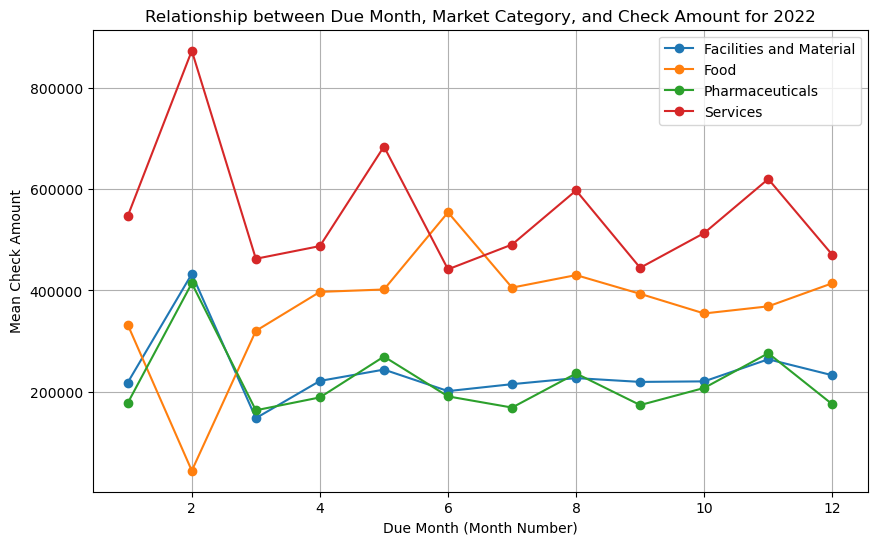

In [15]:
# Filter data for the year 2022
data_2022 = df[df['Fiscal_earned_year'] == 2022]

# Filter relevant columns for analysis
data_to_plot = data_2022[['due_month', 'Market_category', 'Check_Amount']]

# Group by 'Due_month', 'Market_category', and calculate mean 'Check_Amount'
grouped_data = data_to_plot.groupby(['due_month', 'Market_category']).mean().reset_index()

# Create a line plot for 'Check_Amount' across 'Market_category' within each 'Due_month'
plt.figure(figsize=(10, 6))
for category in grouped_data['Market_category'].unique():
    category_data = grouped_data[grouped_data['Market_category'] == category]
    plt.plot(category_data['due_month'], category_data['Check_Amount'], label=category, marker='o')

plt.xlabel('Due Month (Month Number)')
plt.ylabel('Mean Check Amount')
plt.title('Relationship between Due Month, Market Category, and Check Amount for 2022')
plt.legend()
plt.grid(True)
plt.show()


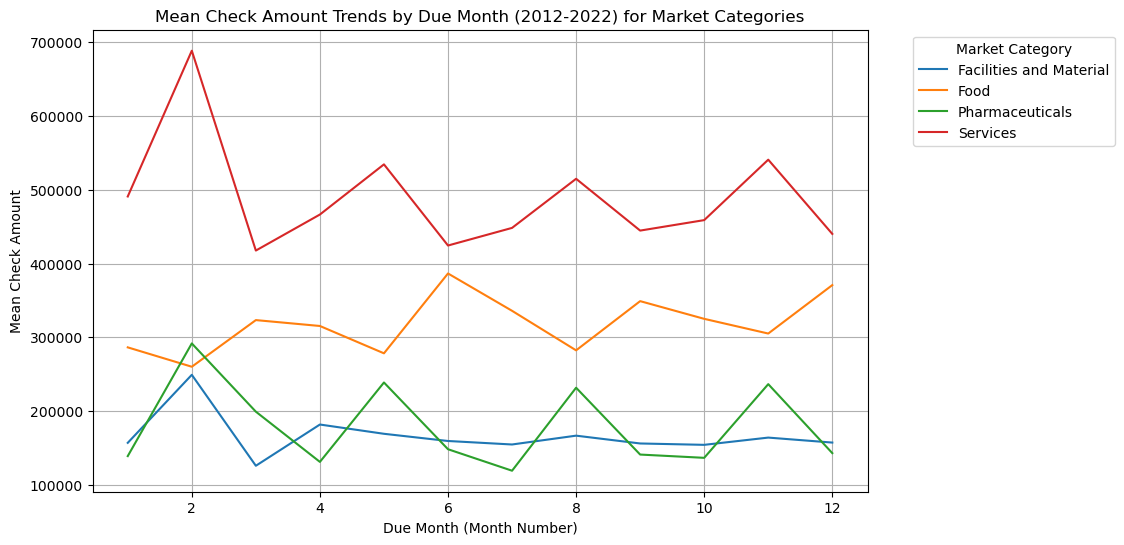

In [16]:
#Compare the 2022 pattern through all years from 2012 - 2022

# Filter rows for the years 2012-2022
data_years = df[(df['Fiscal_earned_year'] >= 2012) & (df['Fiscal_earned_year'] <= 2022)]

# Group by 'Due_month', 'Market_category' and calculate mean Check_Amount for each month
grouped_data = data_years.groupby(['due_month', 'Market_category'])['Check_Amount'].mean().unstack()

# Plotting line charts for each Market Category
plt.figure(figsize=(10, 6))
for category in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[category], label=category)

plt.xlabel('Due Month (Month Number)')
plt.ylabel('Mean Check Amount')
plt.title('Mean Check Amount Trends by Due Month (2012-2022) for Market Categories')
plt.legend(title='Market Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Both visuals (for one year as well as the change over 10 years) express similar pattern of Check Amounts over the months.

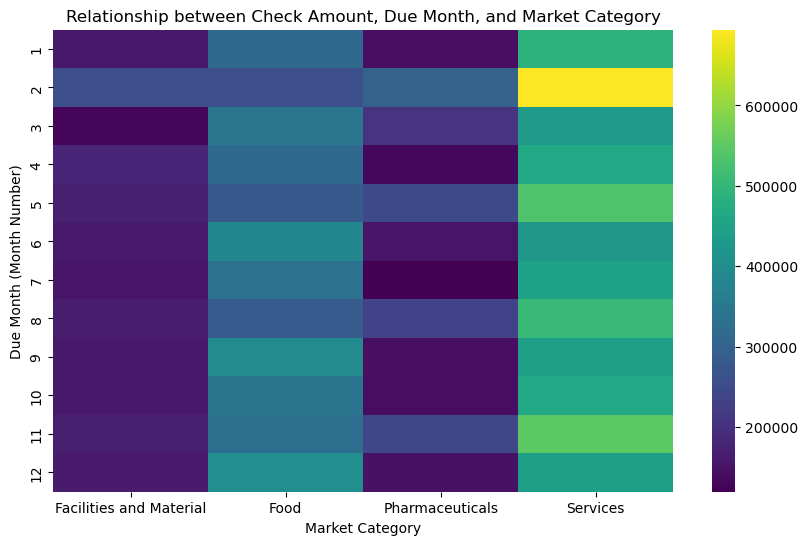

In [17]:
# Filter relevant columns for analysis
data_to_plot = df[['due_month', 'Market_category', 'Check_Amount']]

# Group by 'Due_month' and 'Market_category' to get the mean check amount
grouped_data = data_to_plot.groupby(['due_month', 'Market_category']).mean().reset_index()

# Pivot the data for visualization
pivot_data = grouped_data.pivot(index='due_month', columns='Market_category', values='Check_Amount')

# Create a heatmap to visualize the relationship
plt.figure(figsize=(10, 6))
#sns.heatmap(pivot_data, annot=True, cmap='viridis')
sns.heatmap(pivot_data, cmap='viridis')

plt.xlabel('Market Category')
plt.ylabel('Due Month (Month Number)')
plt.title('Relationship between Check Amount, Due Month, and Market Category')
plt.show()


<Figure size 1000x600 with 0 Axes>

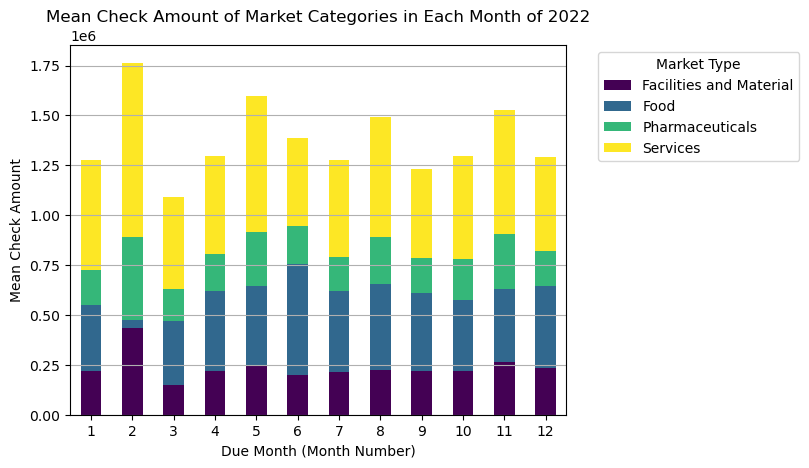

In [18]:
# Filter rows for the year 2022
data_2022 = df[df['Fiscal_earned_year'] == 2022]

# Group by 'Due_month' and 'Market_category' to get the mean Check_Amount for each month in 2022
mean_check_amount_2022 = data_2022.groupby(['due_month', 'Market_category'])['Check_Amount'].mean().unstack()

# Create a bar chart for mean Check_Amount of market types in each month of 2022
plt.figure(figsize=(10, 6))
mean_check_amount_2022.plot(kind='bar', stacked=True, cmap='viridis')

plt.xlabel('Due Month (Month Number)')
plt.ylabel('Mean Check Amount')
plt.title('Mean Check Amount of Market Categories in Each Month of 2022')
plt.legend(title='Market Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

The interactive plot help visualize the change of check amount over the years for the different Market Categories

In [19]:
# Visualize how the Check_Amount compares to the Market Categories over the years

def plot_check_amount(year):
    # Select the data for the specific year
    data_year = df[df['Fiscal_earned_year'] == year]
    # Group by 'Due_month' and 'Market_category' to get the mean check amount for each month and market category in the year
    check_amount_year = data_year.groupby(['due_month', 'Market_category'])['Check_Amount'].mean().unstack().fillna(0)
    plt.figure(figsize=(10, 6))
    check_amount_year.plot(kind='bar', stacked=True, cmap='viridis')
    plt.xlabel('Due Month (Month Number)')
    plt.ylabel('Check Amount')
    plt.title('Check Amount Distribution for Market Categories in Each Month of ' + str(year))
    plt.legend(title='Market Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

interact(plot_check_amount, year=widgets.IntSlider(min=2012, max=2022, step=1, value=2012))

interactive(children=(IntSlider(value=2012, description='year', max=2022, min=2012), Output()), _dom_classes=(…

<function __main__.plot_check_amount(year)>

##### Market Category  -  Summary Statistics

In [20]:
# Group by 'Market_category' and get summary statistics for 'Check_Amount'
summary_stats = df.groupby('Market_category')['Check_Amount'].describe()

# Display the summary statistics
print(summary_stats)

                            count           mean            std   min  \
Market_category                                                         
Facilities and Material   75345.0  161928.971556  383905.206032  0.01   
Food                      58119.0  334425.961958  928337.729229  0.01   
Pharmaceuticals           60834.0  188127.402373  452287.878056  0.01   
Services                 275683.0  484112.543506  949987.127179  0.01   

                             25%       50%        75%          max  
Market_category                                                     
Facilities and Material  2744.10  20734.46  120187.64   4055237.17  
Food                     3691.25  25266.35  101703.17  10402223.49  
Pharmaceuticals          1974.46  14226.44  113995.83  10402223.49  
Services                 7031.06  82961.98  478868.47  10402223.49  


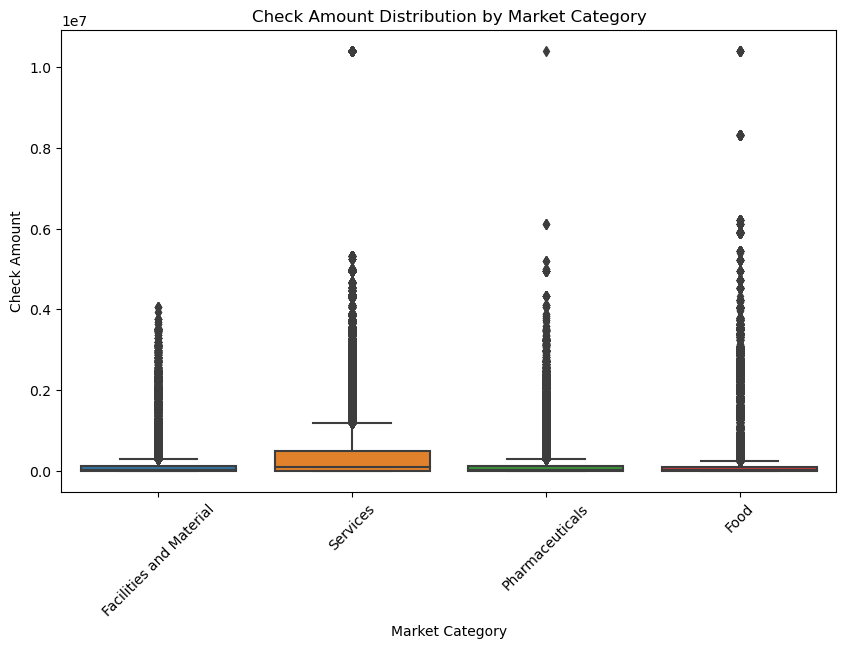

In [21]:
# Box plot to visualize the distribution of Check_Amount by Market_category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Market_category', y='Check_Amount', data=df)
plt.xlabel('Market Category')
plt.ylabel('Check Amount')
plt.title('Check Amount Distribution by Market Category')
plt.xticks(rotation=45)
plt.show()


##### Market Category  -  Observations

Overall, these categories show varying Check_Amount distributions, with 'Services' having the highest mean and 'Facilities and Material' with the lowest. All categories exhibit a wide range of Check_Amount, potential outliers, and some degree of right-skewness, indicating higher values or extreme transactions in certain instances.

## Contract Freq  begins here

##### Contract Frequency - Visualization

This variable represents the contractual obligation as to when payments are made to the organization. I hope to find the relationship to "Seasonality".


In [22]:
df['Contract_freq'].value_counts()

Monthly         388343
Quarterly        81216
Annual             384
As Submitted         9
Name: Contract_freq, dtype: int64

In [23]:
# Filter rows for 2021 and 2022 separately and calculate the mean of 'Check_Amount' for each Market Category

mean_check_amount_m = df[df['Contract_freq'] == 'Monthly']['Check_Amount'].mean()
mean_check_amount_q = df[df['Contract_freq'] == 'Quarterly']['Check_Amount'].mean()
mean_check_amount_a = df[df['Contract_freq'] == 'Annual']['Check_Amount'].mean()
mean_check_amount_as = df[df['Contract_freq'] == 'As Submitted']['Check_Amount'].mean()

print(f"The mean Check_Amount submitted monthly is: {mean_check_amount_m}")
print(f"The mean Check_Amount submitted quarterly is: {mean_check_amount_q}")
print(f"The mean Check_Amount submitted annually is: {mean_check_amount_a}")
print(f"The mean Check_Amount AsSubmitted : {mean_check_amount_as}")

The mean Check_Amount submitted monthly is: 359271.44519229105
The mean Check_Amount submitted quarterly is: 452798.15224376955
The mean Check_Amount submitted annually is: 642119.1055208334
The mean Check_Amount AsSubmitted : 174879.99


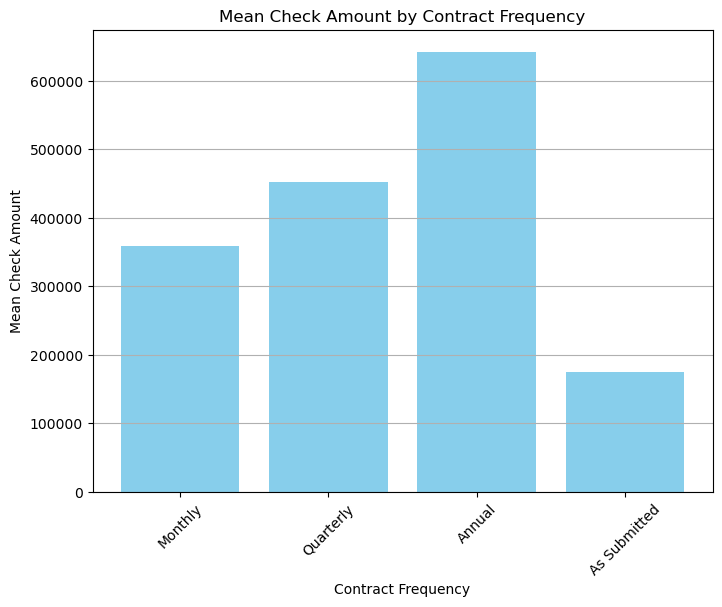

In [24]:
import matplotlib.pyplot as plt

# Calculate mean check amounts for different contract frequencies
mean_check_amounts = [
    df[df['Contract_freq'] == 'Monthly']['Check_Amount'].mean(),
    df[df['Contract_freq'] == 'Quarterly']['Check_Amount'].mean(),
    df[df['Contract_freq'] == 'Annual']['Check_Amount'].mean(),
    df[df['Contract_freq'] == 'As Submitted']['Check_Amount'].mean()
]

# Corresponding labels for the x-axis
contract_freq_labels = ['Monthly', 'Quarterly', 'Annual', 'As Submitted']

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(contract_freq_labels, mean_check_amounts, color='skyblue')
plt.xlabel('Contract Frequency')
plt.ylabel('Mean Check Amount')
plt.title('Mean Check Amount by Contract Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

In [25]:

def plot_check_amount(year):
    # Select the data for the specific year
    data_year = df[df['Fiscal_earned_year'] == year]
    # Group by 'Market_category' to get the mean check amount for each market category in the year
    check_amount_year = data_year.groupby('Contract_freq')['Check_Amount'].mean()
    plt.figure(figsize=(10, 6))
    check_amount_year.plot(kind='bar', color='coral')
    plt.xlabel('Contract Frequency')
    plt.ylabel('Mean Check Amount')
    plt.title('Mean Check Amount for Contract Frequency in ' + str(year))
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

interact(plot_check_amount, year=widgets.IntSlider(min=2012, max=2022, step=1, value=2012))

interactive(children=(IntSlider(value=2012, description='year', max=2022, min=2012), Output()), _dom_classes=(…

<function __main__.plot_check_amount(year)>

This interactive visualization help identify the pattern. Over the years, it is clear that Annual payments are higher.

<Figure size 1000x600 with 0 Axes>

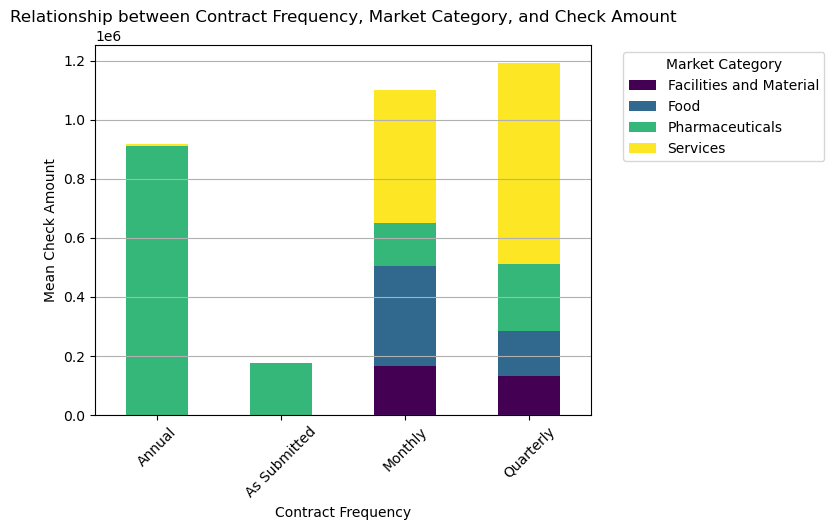

In [26]:
# Filter relevant columns for analysis
data_to_plot = df[['Contract_freq', 'Market_category', 'Check_Amount']]

# Group by 'Contract_freq', 'Market_category', and calculate mean 'Check_Amount'
grouped_data = data_to_plot.groupby(['Contract_freq', 'Market_category']).mean().reset_index()

# Pivot the data for visualization
pivot_data = grouped_data.pivot(index='Contract_freq', columns='Market_category', values='Check_Amount')

# Create a bar chart to visualize the relationship
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, cmap='viridis')

plt.xlabel('Contract Frequency')
plt.ylabel('Mean Check Amount')
plt.title('Relationship between Contract Frequency, Market Category, and Check Amount')
plt.legend(title='Market Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



This plot explains that most 'Pharmaceuticals" contract pay annually, while the highest revenue generator "Services", pay quarterly and monthly. 

This may explain the high variance (dispersion) in some months and the reason for outliers. 

##### Contract Frequency - Summary Statistics

In [27]:
# Group by 'Contract_freq' and get summary statistics for 'Check_Amount'
summary_stats = df.groupby('Contract_freq')['Check_Amount'].describe()

# Display the summary statistics
print(summary_stats)

                  count           mean            std        min          25%  \
Contract_freq                                                                   
Annual            384.0  642119.105521  787311.967750       0.01    1330.7800   
As Submitted        9.0  174879.990000       0.000000  174879.99  174879.9900   
Monthly        388343.0  359271.445192  838688.325493       0.01    4192.1600   
Quarterly       81216.0  452798.152244  840244.404072       0.01    4968.7125   

                      50%          75%          max  
Contract_freq                                        
Annual         183723.585  1142363.855   3204152.89  
As Submitted   174879.990   174879.990    174879.99  
Monthly         42149.730   268524.360  10402223.49  
Quarterly       45425.800   403311.790   6111534.35  


In [28]:
summary_stats = df.groupby(['due_month', 'Contract_freq'])['Check_Amount'].describe()
print(summary_stats)


                           count           mean           std        min  \
due_month Contract_freq                                                    
1         Monthly        32821.0  367042.026362  8.770437e+05       0.01   
          Quarterly       7947.0  372497.742644  7.130884e+05       0.01   
2         Annual           114.0    9404.366491  1.239677e+04     311.34   
          Monthly        12348.0  587031.495366  1.040556e+06       0.01   
          Quarterly       7800.0  470132.012842  9.380481e+05       0.01   
3         Annual           270.0  909265.328667  8.007491e+05       0.01   
          Monthly        45667.0  295719.140903  7.399079e+05       0.01   
          Quarterly       4757.0  723654.214444  1.093623e+06       0.01   
4         As Submitted       2.0  174879.990000  0.000000e+00  174879.99   
          Monthly        37518.0  356865.399019  7.987060e+05       0.01   
          Quarterly       7367.0  343127.391432  6.721344e+05       0.01   
5         As

In [29]:
summary_stats.T

due_month                1                           2                 \
Contract_freq       Monthly     Quarterly        Annual       Monthly   
count          3.282100e+04  7.947000e+03    114.000000  1.234800e+04   
mean           3.670420e+05  3.724977e+05   9404.366491  5.870315e+05   
std            8.770437e+05  7.130884e+05  12396.772036  1.040556e+06   
min            1.000000e-02  1.000000e-02    311.340000  1.000000e-02   
25%            4.572450e+03  4.102975e+03    567.030000  2.191339e+04   
50%            4.442137e+04  2.186729e+04   5000.000000  1.779789e+05   
75%            2.748133e+05  2.320774e+05  14516.900000  6.385423e+05   
max            1.040222e+07  3.485332e+06  40637.180000  1.040222e+07   

due_month                              3                               \
Contract_freq     Quarterly        Annual       Monthly     Quarterly   
count          7.800000e+03  2.700000e+02  4.566700e+04  4.757000e+03   
mean           4.701320e+05  9.092653e+05  2.957191e+05  7.236542e+05   
std            9.380481e+05  8.007491e+05  7.399079e+05  1.093623e+06   
min            1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
25%            5.074170e+03  9.923280e+04  3.032950e+03  1.837377e+04   
50%            4.576141e+04  8.639402e+05  2.716231e+04  1.530146e+05   
75%            3.844718e+05  1.461852e+06  1.824976e+05  9.786021e+05   
max            5.000226e+06  3.204153e+06  1.040222e+07  6.111534e+06   

due_month               4                 ...            9                  \
Contract_freq As Submitted       Monthly  ...       Monthly      Quarterly   
count                 2.00  3.751800e+04  ...  3.305100e+04     504.000000   
mean             174879.99  3.568654e+05  ...  3.632211e+05  105691.329762   
std                   0.00  7.987060e+05  ...  8.760676e+05  151896.148167   
min              174879.99  1.000000e-02  ...  1.000000e-02       0.010000   
25%              174879.99  4.274062e+03  ...  3.929730e+03    7950.060000   
50%              174879.99  4.329373e+04  ...  4.069169e+04   30271.720000   
75%              174879.99  2.631316e+05  ...  2.656678e+05  139543.637500   
max              174879.99  1.040222e+07  ...  1.040222e+07  891094.700000   

due_month               10                                       11  \
Contract_freq As Submitted       Monthly     Quarterly As Submitted   
count                 1.00  3.297800e+04  7.905000e+03         1.00   
mean             174879.99  3.553369e+05  3.579995e+05    174879.99   
std                    NaN  8.626232e+05  6.611689e+05          NaN   
min              174879.99  1.000000e-02  1.000000e-02    174879.99   
25%              174879.99  3.896360e+03  3.725850e+03    174879.99   
50%              174879.99  4.088797e+04  2.252575e+04    174879.99   
75%              174879.99  2.608784e+05  2.265036e+05    174879.99   
max              174879.99  1.040222e+07  3.165628e+06    174879.99   

due_month                                            12                 
Contract_freq       Monthly     Quarterly       Monthly      Quarterly  
count          3.301600e+04  1.187100e+04  3.277500e+04     436.000000  
mean           3.753681e+05  5.449663e+05  3.647170e+05  121687.659564  
std            8.982463e+05  9.519137e+05  8.540194e+05  176563.991791  
min            1.000000e-02  1.000000e-02  1.000000e-02       0.010000  
25%            4.219090e+03  7.430290e+03  4.472045e+03    8984.502500  
50%            4.171449e+04  7.594454e+04  4.460269e+04   33844.460000  
75%            2.621987e+05  5.560808e+05  2.639737e+05  159247.370000  
max            1.040222e+07  4.675971e+06  1.040222e+07  888931.340000  

[8 rows x 34 columns]

##### Contract Frequency - Observations

The observations above that referenced possible seasonality can be explained with this variable. This also could be the reason for outliers where some months, Market categories see spikes in Check Amount.


## Final Thoughts

Both market category and contract frequency are categorical variables. It would be best to code them into numerical value. Hoewver, I went ahead to calcualte the correlation coefficient

In [30]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Market_category' and 'Contract_freq' are categorical columns in your DataFrame 'df'
# Encode categorical columns to numeric values
label_encoder = LabelEncoder()
df['Market_category_encoded'] = label_encoder.fit_transform(df['Market_category'])
df['Contract_freq_encoded'] = label_encoder.fit_transform(df['Contract_freq'])

# Calculate Pearson correlation coefficient between 'Check_Amount' and encoded categorical columns
correlation_market_category = df['Check_Amount'].corr(df['Market_category_encoded'])
correlation_contract_freq = df['Check_Amount'].corr(df['Contract_freq_encoded'])

print(f"Pearson's correlation coefficient between Check Amount and Market Category: {correlation_market_category}")
print(f"Pearson's correlation coefficient between Check Amount and Contract Frequency: {correlation_contract_freq}")


Pearson's correlation coefficient between Check Amount and Market Category: 0.14166604482419176
Pearson's correlation coefficient between Check Amount and Contract Frequency: 0.03993247543998555


As expected, they both show very weak positive relationships.
Most certainly further analysis is required.